# Setup

In [2]:
import pandas as pd
from scipy import stats

In [3]:
import numpy as np

# Laod Data

In [4]:
filename = './Results/output02.csv'
df = pd.read_csv(filename)
df.head()

,MID,IOS_score,Overlap_score,IOS_group
0,1,6,NaN,HighIOS
1,2,5,NaN,HighIOS
2,3,2,0.043478,LowIOS
3,4,1,NaN,LowIOS
4,5,2,0.250000,LowIOS


In [5]:
df.groupby('IOS_group').size()

IOS_group
HighIOS    69
LowIOS     72
Neither    25
dtype: int64

In [6]:
df = df.dropna()
df.head()

,MID,IOS_score,Overlap_score,IOS_group
2,3,2,0.043478,LowIOS
4,5,2,0.250000,LowIOS
6,7,5,1.000000,HighIOS
9,10,5,1.000000,HighIOS
10,11,2,0.055556,LowIOS


In [7]:
df.groupby('IOS_group').size()

IOS_group
HighIOS    35
LowIOS     42
Neither     8
dtype: int64

# Descriptive Statistics on Overlap Score

In [8]:
# Low IOS Group
df.loc[df['IOS_group'] == 'LowIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,42.0,0.420067,0.433367,0.0,0.053363,0.154762,1.0,1.0


In [9]:
# High IOS Group
df.loc[df['IOS_group'] == 'HighIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,35.0,0.443465,0.430034,0.0,0.07072,0.22973,1.0,1.0


# Visualization

## Histogram

array([[<Axes: title={'center': 'HighIOS'}>,
        <Axes: title={'center': 'LowIOS'}>],
       [<Axes: title={'center': 'Neither'}>, <Axes: >]], dtype=object)

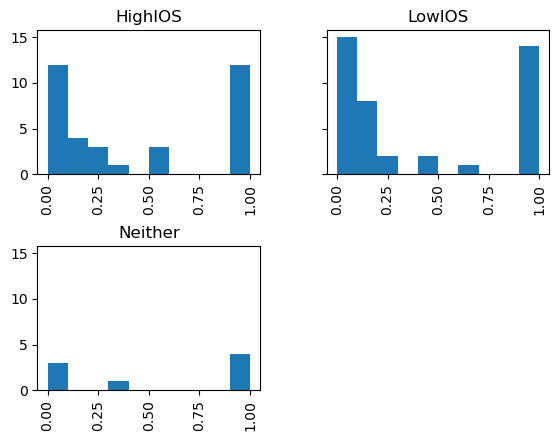

In [10]:
df['Overlap_score'].hist(by=df['IOS_group'], range=[0, 1], sharey=True)

## Scatter plot

<Axes: xlabel='Overlap_score', ylabel='IOS_score'>

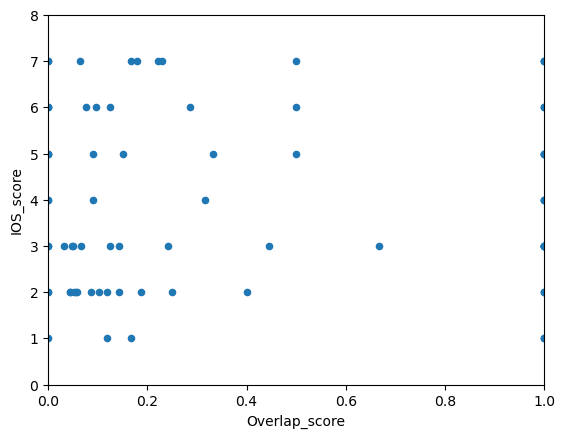

In [11]:
df.plot.scatter(x='Overlap_score', y='IOS_score', xlim=(0, 1), ylim=(0, 8))

## Boxplot

<Axes: title={'center': 'Overlap_score'}, xlabel='[IOS_group]'>

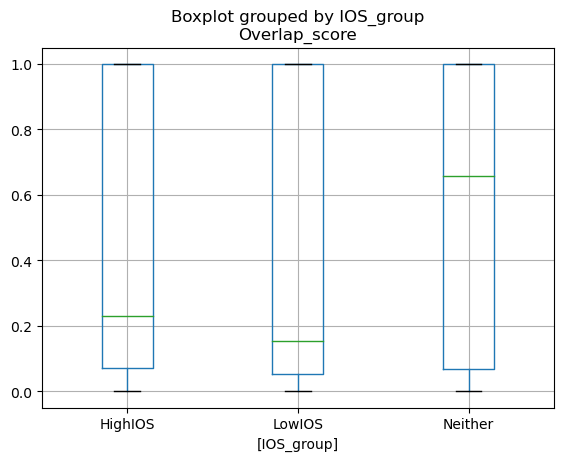

In [12]:
df.boxplot(column=['Overlap_score'], by=['IOS_group'])

# Confirmatory Analyses

## 01: a one-tailed independent two-sample t-test

In [13]:
groupH = df[df['IOS_group']=='HighIOS']
groupL = df[df['IOS_group']=='LowIOS']

stats.ttest_ind(groupH['Overlap_score'], groupL['Overlap_score'], equal_var=False, alternative='greater') # perform Welch's t-test without assuming equal population variance.

TtestResult(statistic=0.23689251755161442, pvalue=0.4067031498414754, df=72.71288482606985)

In [14]:
df.groupby('IOS_group').mean()

,MID,IOS_score,Overlap_score
IOS_group,,,
HighIOS,123.685714,6.000000,0.443465
LowIOS,88.333333,2.309524,0.420067
Neither,107.625000,4.000000,0.550837


In [15]:
df.groupby('IOS_group').std()

,MID,IOS_score,Overlap_score
IOS_group,,,
HighIOS,51.842392,0.840168,0.430034
LowIOS,47.258844,0.715272,0.433367
Neither,27.411872,0.000000,0.489987


### Post hoc power analysis

In [16]:
print('Num. of group H: ' + str(len(groupH)))
print('Num. of group L: ' + str(len(groupL)))

Num. of group H: 35
Num. of group L: 42


In [17]:
def cohens_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    x1_mean = x1.mean()
    x2_mean = x2.mean()
    s1 = x1.std()
    s2 = x2.std()
    s = np.sqrt((n1*np.square(s1) + n2*np.square(s2)) / (n1 + n2))
    d = np.abs(x1_mean - x2_mean) / s
    return d

In [18]:
overlapscore_d = cohens_d(groupH['Overlap_score'], groupL['Overlap_score'])
print('Cohe''s d (Overlapping score): {:.4f}'.format(overlapscore_d))

Cohes d (Overlapping score): 0.0542


In [19]:
# Compute post hoc power with G*Power
print('Post hoc power (Overlap Score): {:.4f}'.format(0.079))

Post hoc power (Overlap Score): 0.0790


## 02: Spearman's rank correlation coefficient between the IOS scores and the overlapping scores

In [20]:
iosscores = df['IOS_score']
overlapscores = df['Overlap_score']

res = stats.spearmanr(iosscores, overlapscores)
res

SignificanceResult(statistic=0.04406418881679422, pvalue=0.6888389283160802)

power = 0.616

In [21]:
len(df['IOS_score'])

85

# Exploratory Analyses

## 01: a logistic regression of the overlapping scores onto the ISO scores

In [22]:
# Sklearn.linear_model.LogisticRegression

## 02: learning curve

In [23]:
# Sklearn: breast-cancer-dataset-logreg-training-curve